# Initial check Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Feature Modeling Libraries:

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Modelling libraries:

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Model Evaluation libraries: 

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Load and initially clean data:

In [5]:
## read existing file
dataset = pd.read_csv('C:\\Users\\Ania\\Desktop\\Loan_Approval\\loan_approval_dataset.csv', sep= ",")

## get rid leading and trailing spaces from column names and drop 'loan_id' column
dataset.columns = dataset.columns.str.strip()
dataset = dataset.drop(columns='loan_id')
dataset.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Dataset Size:

In [6]:
dataset.shape

(4269, 12)

# List of columns:

In [7]:
dataset.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

# Data basic info:

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


# Detect duplicates

In [9]:
duplicates = dataset[dataset.duplicated()]
duplicates

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


# Check missing values:
##### note: decision trees can't work with null data, it has to be dropped 

In [10]:
dataset.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

## Data exploration and visualization
####  In this setction I check what is the distribution between approved and rejected loans.
#### 1) Distribution approved/ rejected seems unbalanced
#### 2) Self-employed/ non - self employed factor seems irrelevant for approving or rejecting loan; Loans approved or rejected irrespecive to work model
#### 3) Also graduate/ not- graduate factor seems irrelevant for loan's approval/ rejection decision 
#### 4) The shortest loan terms, 2 and 4 years have significantly higher number of approved loans

In [11]:
dataset['loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

<Axes: >

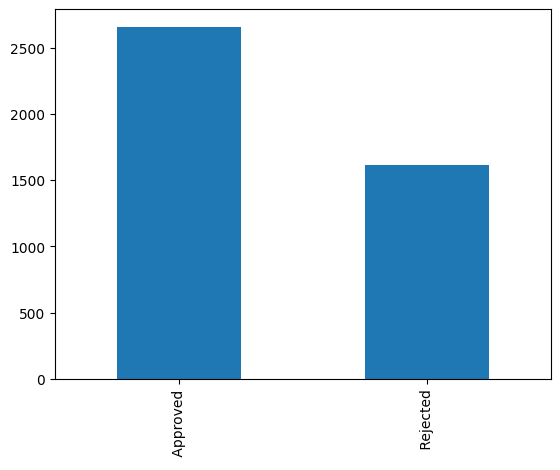

In [12]:
dataset['loan_status'].value_counts().plot(kind='bar')

# Impact of selected variables on loan decision:
### I take 'self_employed', 'education', and 'loan_term':
##### note: take only columns that have few categories or values, otherwise it is not useful, e.g. here: self_employed : yes/no, education: Graduate/ Not Graduate, loan_term (only few terms)

<Axes: xlabel='self_employed'>

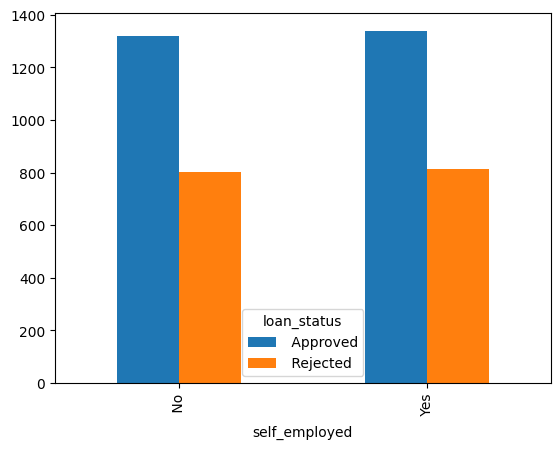

In [13]:
self_employed_factor = pd.crosstab(dataset.self_employed, dataset.loan_status).plot(kind='bar')
self_employed_factor

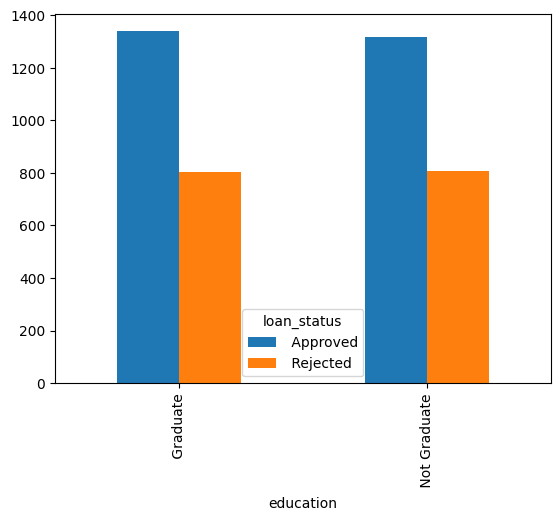

In [14]:
education_factor = pd.crosstab(dataset.education, dataset.loan_status).plot(kind='bar')

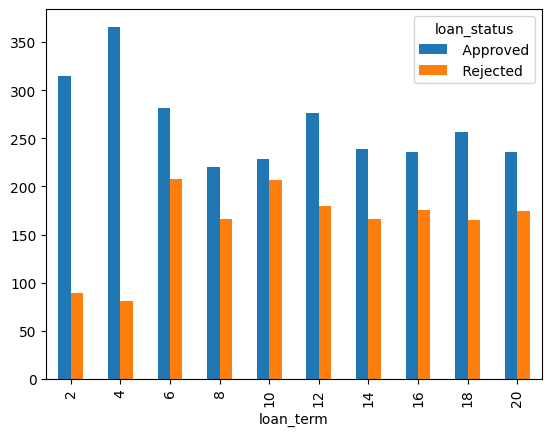

In [15]:
loan_term_factor = pd.crosstab(dataset.loan_term, dataset.loan_status).plot(kind='bar')

# Distribution of numerical columns, which are ints and which floats:
##### note: decision trees only take numerical columns, therefore all categorical columns like here e.g. self_employed: yes/no, or loan_status: approved/ rejected, or for example company departments should changed into numerical variables

In [16]:
int_lst = dataset.select_dtypes(include='int').columns.tolist()
int_lst

['no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [17]:
float_lst = dataset.select_dtypes(include='float').columns.tolist()
float_lst

[]

In [18]:
numerical_columns_lst= ['loan_id',
 'no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

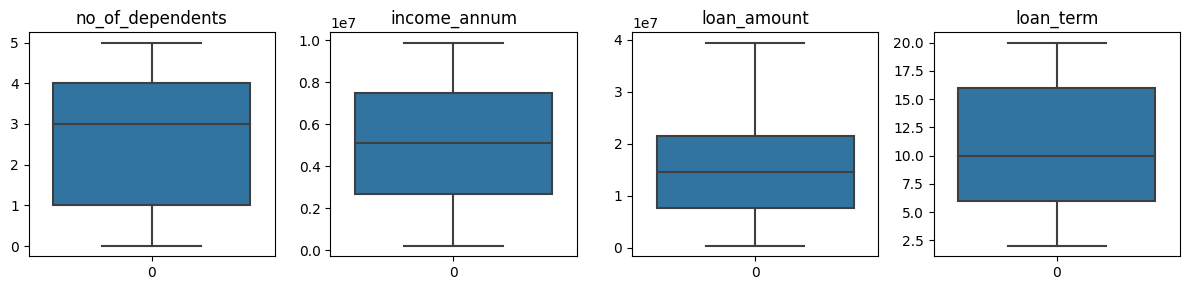

In [19]:
fig, axes = plt.subplots(ncols=4, figsize=(12,3))
for column, axis in zip(numerical_columns_lst[1:5], axes):
    sns.boxplot(data=dataset[column], ax=axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

## Feature Engineering:
#### Converting categorical Features into Numerical, e.g. self_employed - yes/ no into 0,1

In [20]:
label_encoder = LabelEncoder()

In [21]:
dataset['education'] = label_encoder.fit_transform(dataset['education'])
dataset['self_employed'] = label_encoder.fit_transform(dataset['self_employed'])
dataset['loan_status'] = label_encoder.fit_transform(dataset['loan_status'])
dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


## Dependent (Target) and independent Variable:

In [22]:
# x = drop column loan_status
X = dataset.drop('loan_status', axis=1)

# y = only loan_status data
y = dataset['loan_status']

## Split data into Training an Testing:
#### Creating dependent and independent train and test sets

In [23]:
#setting random_state to integer give always the same set of values; if set to None or not given values will be randomnly shuffled every time
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
x_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1675,5,1,0,7900000,29900000,6,568,5800000,13900000,15900000,8700000
1164,0,1,1,9600000,34000000,12,710,23800000,10300000,38100000,7800000
192,1,0,0,800000,2900000,8,682,2200000,1100000,2900000,700000
910,2,0,1,4900000,13100000,18,754,8200000,3300000,16500000,7200000
567,5,0,1,3000000,11100000,12,441,8500000,2500000,7300000,2000000
...,...,...,...,...,...,...,...,...,...,...,...
3444,0,0,1,1300000,4700000,16,530,3200000,1000000,3800000,800000
466,5,1,1,500000,1800000,18,411,1000000,500000,1300000,200000
3092,4,1,1,8600000,20600000,16,449,10800000,10600000,28700000,5400000
3772,2,1,1,7000000,21400000,12,541,3700000,1300000,19800000,9600000


## Feature Scalling:
##### Scalling adjusts data so that each feature (column) has mean = 0, and standard deviation =1; this solution assures all features are on the same scale and have equal meaning for machine learning algorithms.  This is particularly important for machine learning models that are sensitive to the distribution of features, such as linear models and algorithms that rely on distance metrics (e.g., k-nearest neighbors, SVMs),  and Gradient Descent-based models (like Logistic Regression).

##### If my dataset contains features measured in different units (e.g., age in years, income in currency), scaling helps bring these features to a similar range, which can improve the model's performance.

#####  fit_transform(x_train): calculates the mean and standard deviation from x_train (fit), then scales x_train using those values (transform)
##### transform(x_test): scales x_test using the mean and standard deviation learned from x_train. No recalculation is done, just the transformation

In [24]:
standard_scaler = StandardScaler()

In [25]:
xtrain_scaled = standard_scaler.fit_transform(x_train) 
xtest_scaled = standard_scaler.transform(x_test)

In [26]:
xtest_scaled

array([[ 1.51250774, -0.99736803, -1.01504731, ...,  1.15447134,
         0.05627784,  0.72735662],
       [-0.25599737, -0.99736803, -1.01504731, ...,  1.04007205,
         0.28522978,  0.54176071],
       [ 0.33350433, -0.99736803, -1.01504731, ...,  2.57302245,
         1.45179448,  0.51082806],
       ...,
       [ 1.51250774,  1.00263891,  0.98517575, ...,  0.49095549,
        -0.37982112,  0.88201987],
       [ 0.92300603,  1.00263891, -1.01504731, ..., -0.83607619,
        -1.0121646 , -1.09766982],
       [-0.84549907,  1.00263891, -1.01504731, ...,  0.14775765,
        -0.59787059, -0.97393921]])

# Random Forest Model:
##### note: RandomModelClassifier() is used for classification of tasks, where the goal is to predict discrete labels (e.g., categories or classes), meaning: if get loan or not, if email is spam or not, predict category of an image, etc.
##### note: there is also RandomForestRegressor, which is used for regression tasks, where the goal is to predict continous values  (e.g., prices, temperatures).

In [27]:
random_forest_model = RandomForestClassifier()

## Model Training:

In [28]:
random_forest_model.fit(xtrain_scaled, y_train) 

RandomForestClassifier()

In [29]:
y_pred = random_forest_model.predict(xtest_scaled)
y_pred[:10]

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1])

## Model Evaluation:
##### note: the confusion_matrix is used to evaluate performance of a classification model. It compares atual outcomes of test df with predicted outcomes. It helps to see number of correct predicions along with errors made by model 

##### exaplanation of outcome: [[531   5][ 11 307]]:
##### 531 - True Negatives, in this case model predicted 0 (rejection) in y_pred, and actual label in x_test was also 0 (rejection), no error;
#####     5 - False Positives, in this case model predicted 1 (approval) in y_pred, and actual label in x_test was 0 (rejection), errors occured
#####   11 - False Negatives, in this case model predicted 0 (rejection) in y_pred, and actual label in x_test was 1 (approval), errors occured
##### 307 - True Positives, in this case model predicted 1 (approval) in y_pred, and actual label in x_test was also 1 (arrpoval), no error;

In [30]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print(confusion_matrix_rf)
print(len(y_pred), len(y_test))

[[530   6]
 [ 11 307]]
854 854


<Axes: >

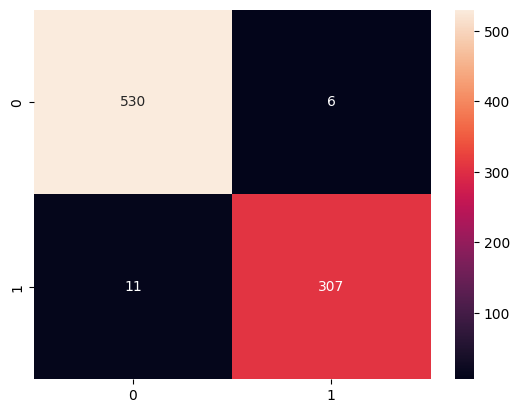

In [31]:
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d')

## Accuracy:

#### measures the proportion of all correct predictions (both positives and negatives) among the total number of cases. Use accuracy when the classes in my dataset are well-balanced. It gives a good overall measure of correctness.
#### accuracy = (True Positives(TP) + True Negatives(TN)) / total number of samples

#### note: when we compare atuals (y_test) to predictions (y_pred) for loan example:
###### True Positive: Actual (approved), Predicted (approved) - ok
###### True Negavite: Actual (rejected), Predicted (rejected) - ok
###### False Positive: Actual (rejected), Predicted (approved) - not ok
###### False Negative: Actual (approved), predicted (rejected) - not ok


In [32]:
model_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', model_accuracy)

Accuracy of the model: 0.9800936768149883


## Precission:
#### measures the proportion of true positive predictions out of all positive predictions made by the model. Use precision when you want to minimize false positives. This is important in scenarios where being wrong about a positive prediction is costly. For example, in fraud detection, you want to be sure that transactions flagged as fraud are truly fraudulent, so you care about precision.
#### precission = True Positives(TP) / (True Positives(TP) + False Positives(FP))

In [33]:
model_precision = precision_score(y_test, y_pred)
print('Precision of the model:', model_precision)

Precision of the model: 0.9808306709265175


## Recall:
#### measures how well the model identifies all the actual positive cases. Use recall when you want to minimize false negatives. This is crucial in situations where missing a positive case is very costly. For example, in a medical test for a serious disease, you want to ensure that all patients with the disease are correctly identified, so you care about recall
#### recall = True Positives(TP) / True Positives(TP) + False Negative(FN)

In [34]:
model_recall = recall_score(y_test, y_pred)
print('Recall of the model:', model_recall)

Recall of the model: 0.9654088050314465


## F1-Score:
#### The mean of precision and recall, providing a balance between the two. It is particularly useful when I need a balance between precision and recall. Serves well for imbalanced datasets, where one class (e.g. loan - rejected) is represented more often. 
#### F1-score = 2 x (Precission x Recall) / (Precission + Recall)

In [35]:
f1_score_rf = f1_score(y_test, y_pred)
print('F1-score of the model:', f1_score_rf)

F1-score of the model: 0.9730586370839936


## Classification Report:

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



## Feature Importance Matrix in Random Forecast:
### in this task I check which of features are the most impactful to the model

In [37]:
score_lst = random_forest_model.feature_importances_
list_of_features = list(X.columns)
score_df= pd.DataFrame({'Feature': list_of_features, 'Score': score_lst})
score_df.sort_values(by='Score', ascending=False)

,Feature,Score
6,cibil_score,0.818169
5,loan_term,0.061131
4,loan_amount,0.028890
3,income_annum,0.017448
7,residential_assets_value,0.016591
9,luxury_assets_value,0.015999
10,bank_asset_value,0.014667
8,commercial_assets_value,0.014639
0,no_of_dependents,0.007367
2,self_employed,0.002847


<Axes: xlabel='Score', ylabel='Feature'>

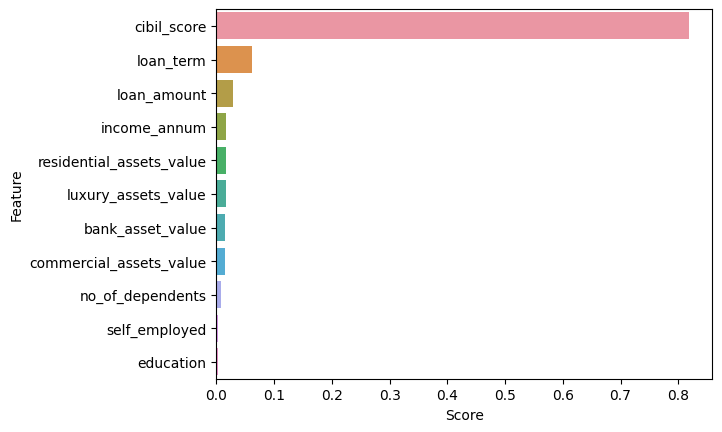

In [38]:
sns.barplot(data=score_df.sort_values(by='Score', ascending=False), y='Feature', x='Score', orient='h')

### k-fold Cross Validation:
#### is a technique that splits the entire dataset into K equal-sized subsets or "folds. The model is then trained on K-1 folds and tested on the remaining fold; this process is repeated K times (cv), each time with a different fold as the test set.

In [39]:
scores_rf = cross_val_score(random_forest_model, xtrain_scaled, y_train, cv=5, scoring='accuracy')
print('Cross-validation scores:', scores_rf)

Cross-validation scores: [0.9795022  0.97364568 0.9795022  0.98096633 0.9795022 ]


In [40]:
avg_model_score = scores_rf.mean()
print('Average Model Score:', avg_model_score)

Average Model Score: 0.9786237188872622


## Hyperparameter Tuning for Random Forest:
### # Grid search | Random Search:

#####  n-estimators - number of trees in the Random Forest
##### max_features - number of features to consider when looking for best split
##### for small number of features (columns) square root and log2 will be the same or very similar, they change with larger number of features (columns):
##### sqrt_16 = 16 ** 0.5  ----> sqrt_9 = 4
##### sqrt_25 = 25 ** 0.5 -----> sqrt_25 = 5 
##### sqrt_100 = 100 ** 0.5 ------> sqrt_100 = 10
##### at the same time in  log2:
##### log2_16 =  math.log2(16) -------> log2_16 = 4
##### log2_25 =  math.log2(25)  -------> log2_25 ≈ 4.64
##### log2_100 = math.log(100) -------->  log2_100 ≈ 6.64

#### How it works?
#### Suppose I have 10 features (columns): 
####  - if I consider max_features = sqrt, model will take only 3 columns
####  - if I consider max_features = log2, model will take only 3 columns as well
####  - if I consider max_features = None, model will take all columns available (10 as in description) 
#### nax_features takes only int or float therefore  in case of "None" we have to give number of features (columns), in my case:max_features = len(list_of_features)


In [41]:
parameters = {
    'n_estimators': [50,100],
    'max_features': ['sqrt', 'log2', None]
}

### Search the best parameters:

In [42]:
grid_search_rt = GridSearchCV(estimator=random_forest_model, param_grid=parameters)

In [43]:
grid_search_rt.fit(xtrain_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

In [44]:
print("Best: %f using %s" % (grid_search_rt.best_score_, grid_search_rt.best_params_))

Best: 0.983602 using {'max_features': None, 'n_estimators': 100}


### Building NEW model with best parameters

In [45]:
random_forest_model_new = RandomForestClassifier(max_features=len(list_of_features), n_estimators=50)

In [46]:
random_forest_model_new.fit(xtrain_scaled, y_train)

RandomForestClassifier(max_features=11, n_estimators=50)

### Average Accuracy Score for Cross Validation:

In [47]:
scores_new = cross_val_score(random_forest_model_new, xtrain_scaled, y_train, cv=5, scoring='accuracy')
print('Cross-validation scores:', scores_new)

Cross-validation scores: [0.98389458 0.97803807 0.98535871 0.98682284 0.98535871]


In [48]:
avg_model_score_new = scores_new.mean()
print('Average Model Score for New Model:', avg_model_score_new)

Average Model Score for New Model: 0.9838945827232797


# Logistic Regression Model:

In [49]:
#initiate instance of the class
logistic_regression_model = LogisticRegression()

## Model Training:

In [50]:
logistic_regression_model.fit(xtrain_scaled, y_train)

LogisticRegression()

In [51]:
y_pred_lr = logistic_regression_model.predict(xtest_scaled)


In [52]:
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(confusion_matrix_lr)
print(len(y_pred_lr), len(y_test))

[[498  38]
 [ 43 275]]
854 854


<Axes: >

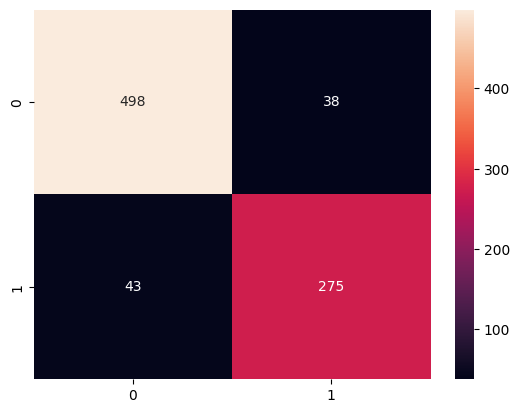

In [53]:
sns.heatmap(confusion_matrix_lr, annot=True, fmt='d')

## Accuracy for Logistic Regression:

In [54]:
model_accuracy_rf = accuracy_score(y_test, y_pred_lr)
print('Accuracy of the model:', model_accuracy_rf)

Accuracy of the model: 0.905152224824356


In [55]:
model_precision_lr = precision_score(y_test, y_pred_lr)
print('Precision of the model:', model_precision_lr)

Precision of the model: 0.8785942492012779


## Recall for Logistic Regression:

In [56]:
model_recal_lr = recall_score(y_test, y_pred_lr)
print('Precision of the model:', model_recal_lr)

Precision of the model: 0.8647798742138365


## F1-Score for Logistic Regression:

In [57]:
f1_score_lr = f1_score(y_test, y_pred_lr)
print('Precision of the model:', model_recal_lr)

Precision of the model: 0.8647798742138365


## Classification Report:

In [58]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



### Cross - validation for Logistic Regression:

In [59]:
scores_lr = cross_val_score(logistic_regression_model, xtrain_scaled, y_train, cv=5, scoring='accuracy')
print('Cross-validation scores:', scores_lr)

Cross-validation scores: [0.90629575 0.91068814 0.93118594 0.91508053 0.92972182]


## Hyperparameter tuning: 

In [60]:
parameters_lr = [
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10, 100]
    },
    {
        'solver': ['saga'],
        'penalty': ['elasticnet'],
        'C': [0.1, 1, 10, 100],
        'l1_ratio': [0.5]
    },
    
    {
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'penalty': ['l2'],
        'C': [100, 10, 1.0, 0.1, 0.01]
    }
]

In [61]:
grid_search_lr = GridSearchCV(estimator=logistic_regression_model, param_grid=parameters_lr, cv=5, scoring='accuracy')

In [62]:
grid_search_lr.fit(xtrain_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                          'solver': ['saga']},
                         {'C': [0.1, 1, 10, 100], 'l1_ratio': [0.5],
                          'penalty': ['elasticnet'], 'solver': ['saga']},
                         {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear']}],
             scoring='accuracy')

In [63]:
print("Best: %f using %s" % (grid_search_lr.best_score_, grid_search_lr.best_params_))

Best: 0.923572 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [64]:
logistic_regression_model_new = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')

In [65]:
logistic_regression_model_new.fit(xtrain_scaled, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [66]:
y_pred_lr_new = logistic_regression_model.predict(xtest_scaled)

In [67]:
confusion_matrix_lr_grid = confusion_matrix(y_test, y_pred_lr_new)
print(confusion_matrix_lr_grid)
print(len(y_pred_lr), len(y_test))

[[498  38]
 [ 43 275]]
854 854


<Axes: >

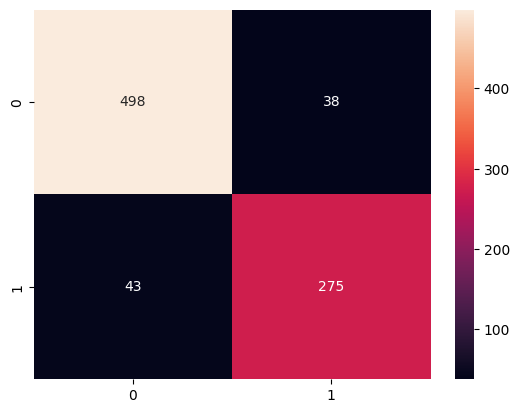

In [68]:
sns.heatmap(confusion_matrix_lr_grid, annot=True, fmt='d')

In [69]:
model_accuracy_lr_new = accuracy_score(y_test, y_pred_lr_new)
print('Accuracy of the model:', model_accuracy_lr_new)

Accuracy of the model: 0.905152224824356


### Cross - validation for Logistic Regression after hyperparameter tuning:

In [70]:
scores_lr_new = cross_val_score(logistic_regression_model_new, xtrain_scaled, y_train, cv=5, scoring='accuracy')
print('Cross-validation scores:', scores_lr_new)

Cross-validation scores: [0.9136164  0.9136164  0.92972182 0.92825769 0.93265007]
